## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
3. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
4. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will lose points for your work in that section.
5. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
6. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the autograder will ignore the modified "assert" statement. Make sure you don't edit the assert statements.
7. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
8. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
9. The **Grading** section at the end of the document (before the **Feedback** section) contains some code for our autograder on GradeScope. You are expected to fail this block of code in your Jupyter environment. DO NOT edit this block of code, or you may not get points for your assignment.
10. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Supervised Learning - Regularization

In this exercise we're going to look at how to lower the chance of overfitting by using regularization parameters with a variety of different linear models. 

## Lasso & Ridge Regression

[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge) are two commonly used linear models with regularization. 

Lasso uses the $l_1$ norm for regularization and so has the following objective:

$$ 1 / (2 * n_{samples}) * ||y - Xw||^2_2 + \alpha * ||w||_1 $$ 

Whereas Ridge regression uses the $l_2$ norm for regularization and has the following objective:

$$ ||y - Xw||^2_2 + \alpha * ||w||^2_2 $$





In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [3]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [4]:
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [5]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)

In this exercise, we are building a model to predict the y values which are all 1's. We could easily do this with a linear model of all coefficients set to 0 and an intercept of 1. However, what we're trying to show is the power of the model with changing the coefficients with respect to the input variable and not using an intercept. 

In creating your model, make sure to set the **fit_intercept to False**. This will then allow you to more easily see the value in changing the $\alpha$ values.

[Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) is some documentation to help you through this problem.

In [14]:
def determine_coefficients(alphas, model_class, X, y):
    """Determine the coefficients of a linear model given the various alphas. 
    You should train a model for each value of alpha
    
    Args:
        alphas (iterable): The alphas to test out with the model
        model_class (sklearn.estimator Class): A type of linear model **not instantiated**
        X (iterable): The data to train on
        y (iterable): The labels to train on
        
    Returns:
        coefs (iterable): the coefficients extracted from the trained model. See model.coef_
    """
    # YOUR CODE HERE
    coefs = []
    for alpha in alphas:

        model = model_class(alpha=alpha, fit_intercept=False)

        model.fit(X, y)

        coefs.append(model.coef_)
    return coefs

In [15]:
coefs = determine_coefficients(alphas, Ridge, X, y)

In [16]:
assert 'coefs' in locals()
assert coefs[0].shape == (10,)
assert len(coefs) == len(alphas)

The goal of this activity is to allow you to see that the Ridge regression $l_2$ norm penalty drives weights to small, but non-zero, values. The Lasso $l_1$ norm penalty drives many weights to zero, but not all of them, which you will see a bit later in this activity.

This is difficult to observe using on the following plot for the Ridge regression results. I suggest commenting out `ax.plot(alphas, coefs)` and writing in `ax.semilogy(alphas, np.abs(coefs))` to plot the absolute value of the coefficients on a log scale to more clearly see its effects.

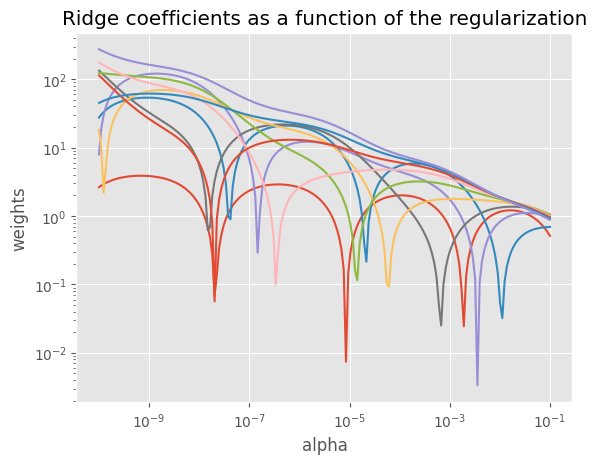

In [18]:
ax = plt.gca()

# ax.plot(alphas, coefs)
ax.semilogy(alphas, np.abs(coefs))
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [19]:
# Set the coefficients of lasso with the same data and alphas as ridge to lassoCoefs
# YOUR CODE HERE
lassoCoefs = determine_coefficients(alphas, Lasso, X, y)

C:\Users\funkb\.virtualenvs\Machine-Learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e-02, tolerance: 1.000e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\funkb\.virtualenvs\Machine-Learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e-02, tolerance: 1.000e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\funkb\.virtualenvs\Machine-Learning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [20]:
assert 'lassoCoefs' in locals()
assert lassoCoefs[0].shape == (10,)
assert len(lassoCoefs) == len(alphas)
assert not np.all([lassoCoefs,coefs])

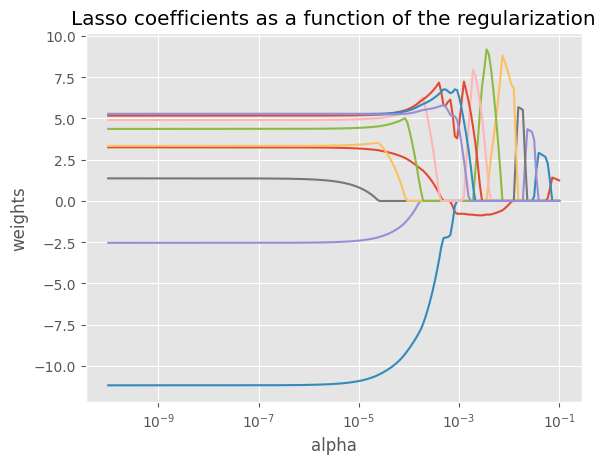

In [21]:
ax = plt.gca()

ax.plot(alphas, lassoCoefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Note that with lasso, the coefficients are significantly smaller.

## Elastic Net

[Elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elastic#sklearn.linear_model.ElasticNet) combines the two approaches by using both the $l_1$ and $l_2$ squared norms minimizing the objective:

$$ 1 / (2 * n_{samples}) * ||y - Xw||^2_2
+ \alpha * l1_{ratio} * ||w||_1
+ 0.5 * \alpha * (1 - l1_{ratio}) * ||w||^2_2$$



> The next section is copied from [the documentation](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html) and is meant to show you how the coefficients change with various values of alpha for both lasso and elastic net. 

In [22]:
from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

eps = 5e-3

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [23]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

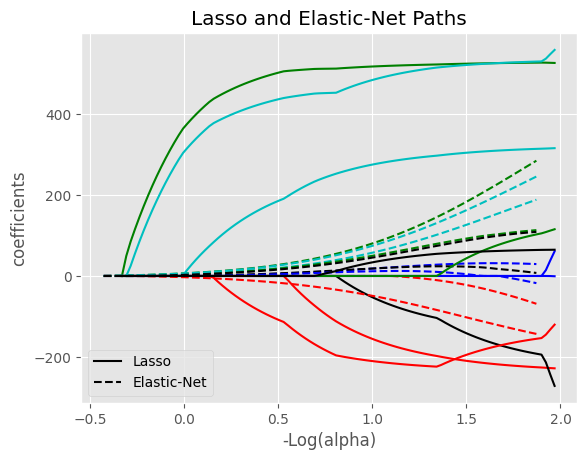

In [24]:
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')
plt.show()

Note that with elastic net, the coefficients go above zero with a larger value of alpha. Change the `l1_ratio` above and see how that affects the graph.

The higher the `l1_ratio` the faster the coefficients should go above zero.

# Grading
The following code block is purely used for grading. If you find any error, you can ignore. DO NOT MODIFY THE CODE BLOCK BELOW.

In [ ]:
# Autograding with Otter Grader
import otter
grader = otter.Notebook()
grader.check_all()

## Feedback

In [25]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return "It was cool to visualize the lasso and ridge regression"